In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Partisan-Responses-master')

Import libraries

In [2]:
import pandas as pd
import numpy as np
import spacy
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
from tqdm import tqdm
import time

import matplotlib.pyplot as plt
%matplotlib inline

#### Get questions and answers from all years

In [7]:
start_time = time.time()
bound = Heinbound(PATH)
df = bound.filter_multiple_editions(range(106, 112))  #final range?

100%|█████████████████████████████████████████████████████████████████████████| 141407/141407 [14:41<00:00, 160.41it/s]


finished file 106. 58394 pairs found


100%|█████████████████████████████████████████████████████████████████████████| 116415/116415 [11:44<00:00, 165.27it/s]


finished file 107. 47803 pairs found


100%|█████████████████████████████████████████████████████████████████████████| 125664/125664 [12:26<00:00, 168.34it/s]


finished file 108. 52659 pairs found


100%|█████████████████████████████████████████████████████████████████████████| 119506/119506 [12:10<00:00, 163.56it/s]


finished file 109. 52532 pairs found


100%|█████████████████████████████████████████████████████████████████████████| 133182/133182 [13:47<00:00, 160.87it/s]


finished file 110. 58011 pairs found


100%|█████████████████████████████████████████████████████████████████████████| 112550/112550 [11:01<00:00, 170.05it/s]


finished file 111. 52966 pairs found


'01:16:03'

In [8]:
df.to_pickle("all_speeches.pkl")

### Dataset Analysis

In [10]:
df = pd.read_pickle("all_speeches.pkl")

In [11]:
no_sentences = []
for i in range(len(df)):
    answer = df.iloc[i].Questions
    sents = nltk.sent_tokenize(answer)
    no_sentences.append(len(sents))

(array([11050.,  9800.,  8985.,  9090.,  9570., 10249., 10791., 11160.,
        11280., 10715., 10292.,  9726.,  9509.,  8752.,  8327.,  7891.,
         7300.,  6904.,  6632.,  6228.,  5970.,  5503.,  5176.,  4972.,
         4739.,  4486.,  4235.,  4114.,  3784.,  3680.,  3425.,  3318.,
         3100.,  2988.,  2814.,  2669.,  2439.,  2452.,  2195.,  2054.,
         2049.,  1944.,  1864.,  1691.,  1596.,  1570.,  1503.,  1414.,
         1283.,     0.,  1276.,  1211.,  1087.,  1069.,  1004.,  1031.,
          859.,   871.,   895.,   794.,   831.,   782.,   716.,   664.,
          727.,   675.,   660.,   586.,   542.,   599.,   578.,   475.,
          543.,   448.,   441.,   462.,   458.,   402.,   402.,   397.,
          373.,   368.,   346.,   363.,   333.,   324.,   327.,   312.,
          296.,   278.,   266.,   295.,   284.,   251.,   218.,   252.,
          250.,   235.,   213.,   234.]),
 array([  2.  ,   2.98,   3.96,   4.94,   5.92,   6.9 ,   7.88,   8.86,
          9.84,  10.82

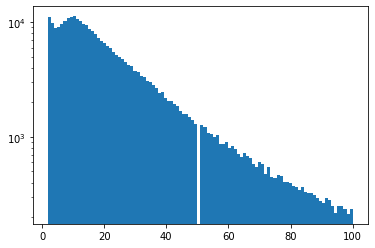

In [12]:
plt.hist(no_sentences, bins=100, range=(2, 100), log=True)

## Sentence Removal
In this section, we continue preprocess speeches with the aim of removing administrative phrases and sentencese, e.g. "Mr. Speker", "I reserve the balance of my time"